In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.4.4
numpy version: 1.24.4
seaborn version: 0.11.2


In [2]:
mall_data=pd.read_csv("C:/Users/MYCOM/data/Mall_Customers.csv")
print('There are {} rows and {} columns in our dataset'.format(mall_data.shape[0],mall_data.shape[1]))

There are 200 rows and 5 columns in our dataset


In [3]:
mall_data.sample(10)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
38           39  Female   36                  37                      26
78           79  Female   23                  54                      52
71           72  Female   47                  49                      42
182         183    Male   46                  98                      15
176         177    Male   58                  88                      15
55           56    Male   47                  43                      41
137         138    Male   32                  73                      73
30           31    Male   60                  30                       4
2             3  Female   20                  16                       6
15           16    Male   22                  20                      79

In [4]:
mall_data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [5]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Exploratory Data Analysis

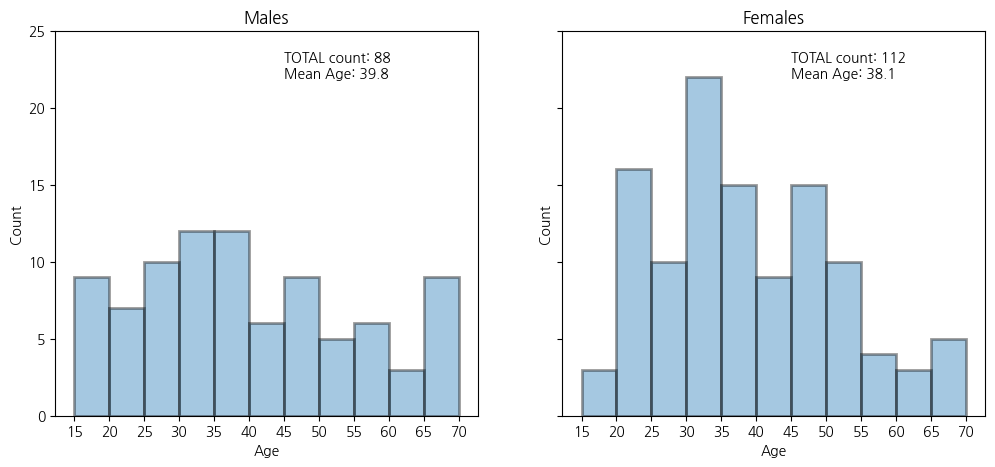

In [10]:
males_age=mall_data[mall_data['Gender']=='Male']['Age']
females_age=mall_data[mall_data['Gender']=='Female']['Age']

age_bins=range(15,75,5)
# males histogram
fig2,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5),sharey=True)
sns.distplot(males_age,bins=age_bins,kde=False,
             ax=ax1,hist_kws=dict(edgecolor='k',linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23,'TOTAL count: {}'.format(males_age.count()))
ax1.text(45,22,'Mean Age: {:.1f}'.format(males_age.mean()))

# females histogram
sns.distplot(females_age,bins=age_bins,kde=False,
             ax=ax2,hist_kws=dict(edgecolor='k',linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23,'TOTAL count: {}'.format(females_age.count()))
ax2.text(45,22,'Mean Age: {:.1f}'.format(females_age.mean()))

plt.show()

In [11]:
print('Kologomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age,females_age)[1]))
# meaning the difference between these two groups are statistically insignificant

Kologomorov-Smirnov test p-value: 0.49


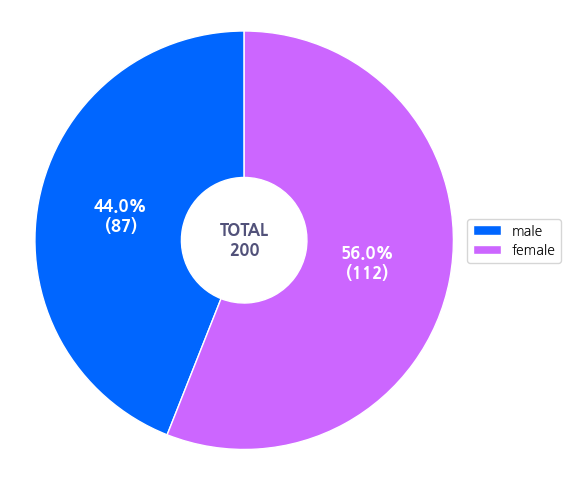

In [15]:
def labeler(pct,allvals):
    absolute=int(pct/100.*np.sum(allvals))
    return '{:.1f}%\n({:d})'.format(pct,absolute)

sizes=[males_age.count(),females_age.count()] #wedge sizes
fig0,ax1=plt.subplots(figsize=(6,6))
wedges,texts,autotexts=ax1.pie(sizes,autopct=lambda pct: labeler(pct,sizes),radius=1,
                              colors=['#0066ff','#cc66ff'],
                              startangle=90, textprops=dict(color='w'),
                              wedgeprops=dict(width=0.7,edgecolor='w'))
ax1.legend(wedges, ['male','female'],loc='center right', bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(mall_data['Age'].count()),
         weight='bold', size=12, color='#52527a',ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  # Equal aspect ratio
plt.show()
# more female customers than male ones

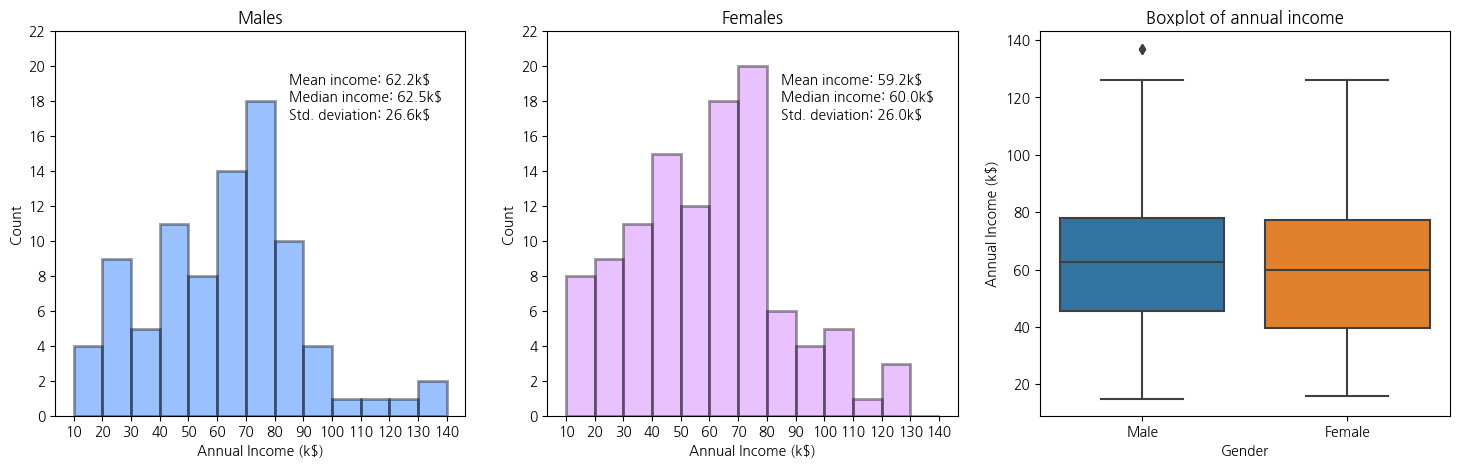

In [18]:
males_income=mall_data[mall_data['Gender']=='Male']['Annual Income (k$)']
females_income=mall_data[mall_data['Gender']=='Female']['Annual Income (k$)']
my_bins=range(10,150,10)

# males histogram
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,5))
sns.distplot(males_income,bins=my_bins,kde=False,color='#0066ff',ax=ax1,
            hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, 
             hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender',y='Annual Income (k$)',data=mall_data,ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

In [19]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

# test show that these two groups are not statistically different

Kolgomorov-Smirnov test p-value: 0.78


C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


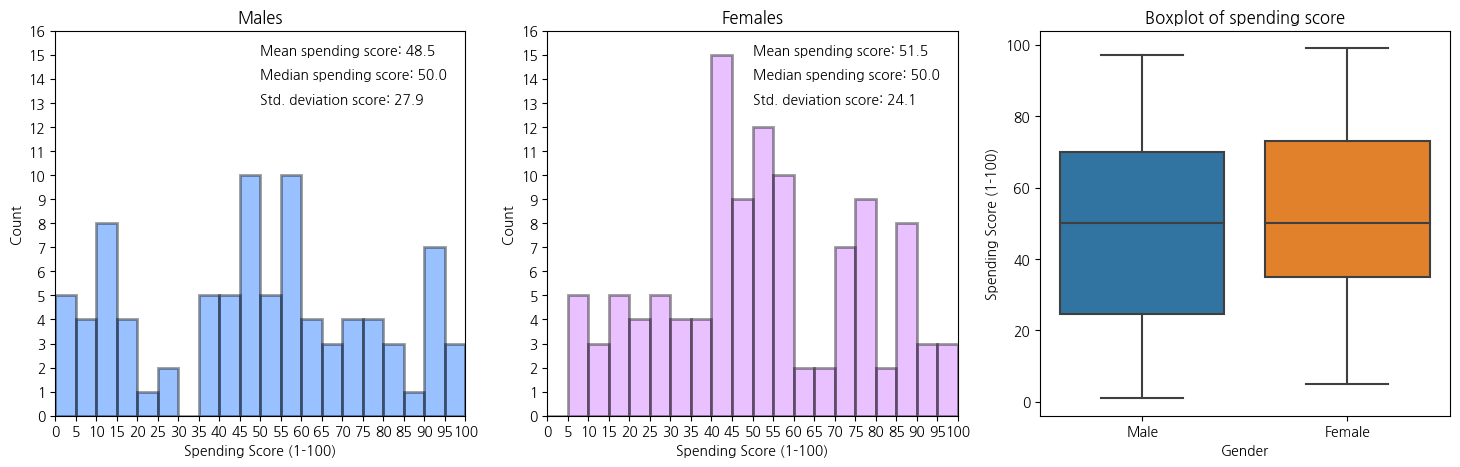

In [20]:
males_spending=mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)']
females_spending=mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)']
spending_bins=range(0,105,5)

# males histogram
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18,5))
sns.distplot(males_spending,bins=spending_bins,kde=False,color='#0066ff',
            ax=ax1,hist_kws=dict(edgecolor='k',linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15,'Mean spending score: {:.1f}'.format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# females histogram
sns.distplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff',
             ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()


In [21]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))

# a mean spending score for women is higher than men
# KS test pvalue indicates that there is no evidence to reject the null hypothesis

Kolgomorov-Smirnov test p-value: 0.29


In [22]:
# calculate median income for all age groups
medians_by_age_group=mall_data.groupby(['Gender',pd.cut(mall_data['Age'],age_bins)]).median()
medians_by_age_group.index=medians_by_age_group.index.set_names(['Gender','Age_group'])
medians_by_age_group.reset_index(inplace=True)

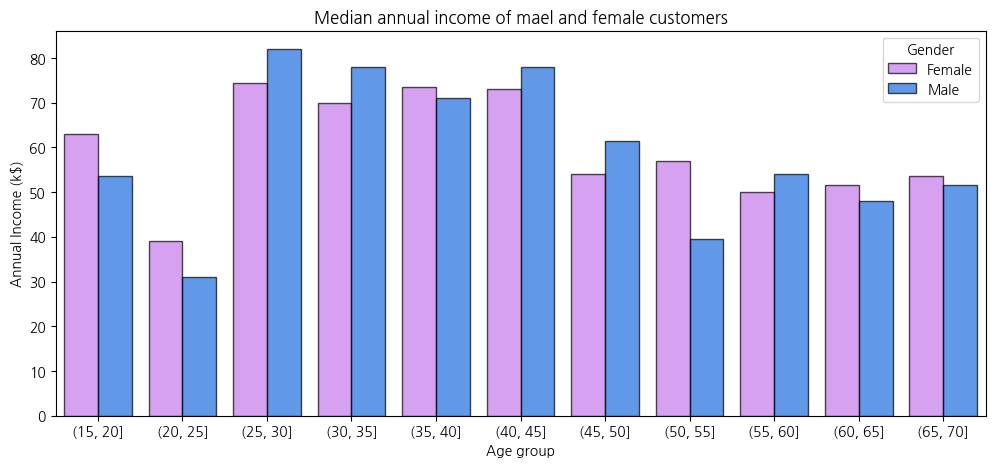

In [24]:
fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group',y='Annual Income (k$)',hue='Gender',data=medians_by_age_group,
           palette=['#cc66ff','#0066ff'],
           alpha=0.7,edgecolor='k',ax=ax)
ax.set_title('Median annual income of mael and female customers')
ax.set_xlabel('Age group')
plt.show()
# the most wealth customers are in age of 25-45 years old
# biggest difference between women and men is visible in age groups 25-30 and 50-55

### Correlations

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MYCOM\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


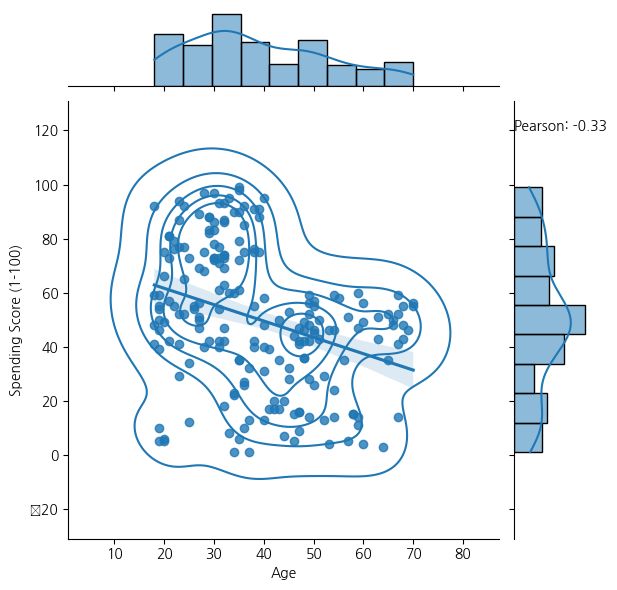

In [25]:
from scipy.stats import pearsonr
corr,_=pearsonr(mall_data['Age'],mall_data['Spending Score (1-100)'])
jp=(sns.jointplot('Age','Spending Score (1-100)',data=mall_data,
                 kind='reg')).plot_joint(sns.kdeplot,zorder=0,n_levels=6)
plt.text(0,120,'Pearson: {:.2f}'.format(corr))
plt.show()

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


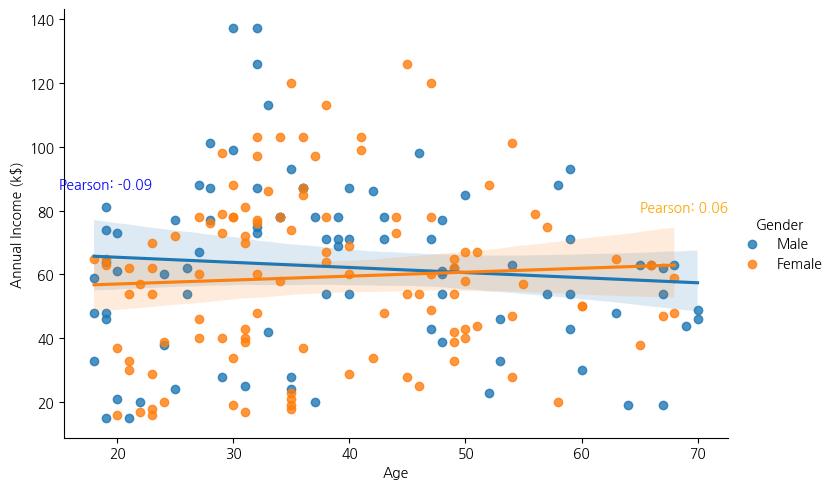

In [26]:
# calculatiing Pearson's correlations
corr1,_=pearsonr(males_age.values,males_income.values)
corr2,_=pearsonr(females_age.values,females_income.values)
sns.lmplot('Age','Annual Income (k$)',data=mall_data,hue='Gender',aspect=1.5)
plt.text(15,87,'Pearson: {:.2f}'.format(corr1),color='blue')
plt.text(65,80,'Pearson: {:.2f}'.format(corr2),color='orange')
plt.show()

# negligible correlation btw age and annual income of customers for both sex groups

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


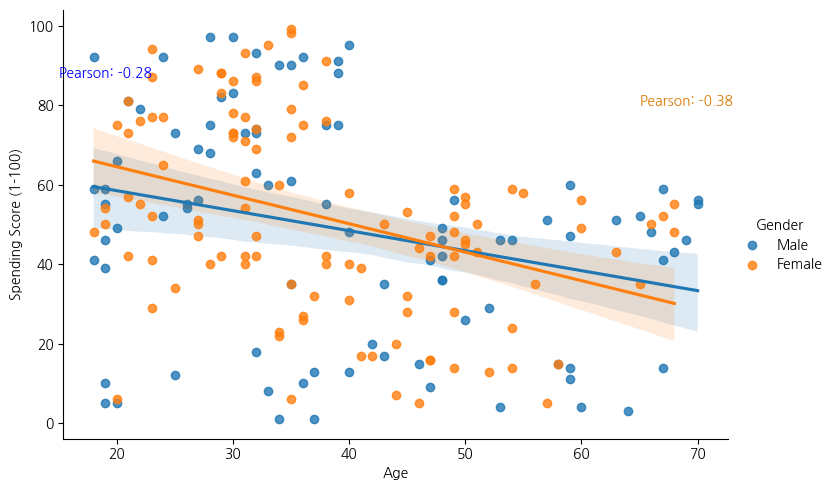

In [27]:
# calculatiing Pearson's correlations
corr1,_=pearsonr(males_age.values,males_spending.values)
corr2,_=pearsonr(females_age.values,females_spending.values)
sns.lmplot('Age','Spending Score (1-100)',data=mall_data,hue='Gender',aspect=1.5)
plt.text(15,87,'Pearson: {:.2f}'.format(corr1),color='blue')
plt.text(65,80,'Pearson: {:.2f}'.format(corr2),color='#d97900')
plt.show()

# a weak negative correlations btw age and spending score for both sex groups

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


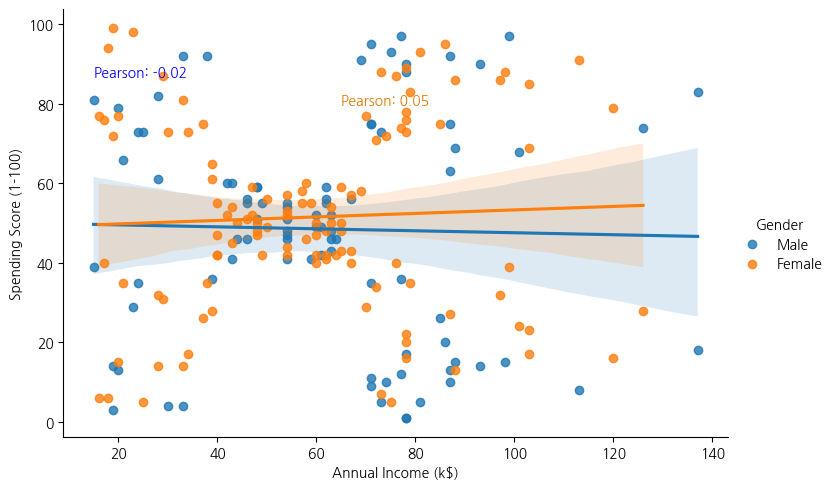

In [28]:
# calculatiing Pearson's correlations
corr1,_=pearsonr(males_income.values,males_spending.values)
corr2,_=pearsonr(females_income.values,females_spending.values)
sns.lmplot('Annual Income (k$)','Spending Score (1-100)',data=mall_data,hue='Gender',aspect=1.5)
plt.text(15,87,'Pearson: {:.2f}'.format(corr1),color='blue')
plt.text(65,80,'Pearson: {:.2f}'.format(corr2),color='#d97900')
plt.show()

# negligible correlations btw annual income and spending score for both sex groups

## Clustering
### K-Means

In [29]:
from sklearn.cluster import KMeans
# clustering only numeric columns
X_numerics=mall_data[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [31]:
! pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 4.3 MB/s eta 0:00:00


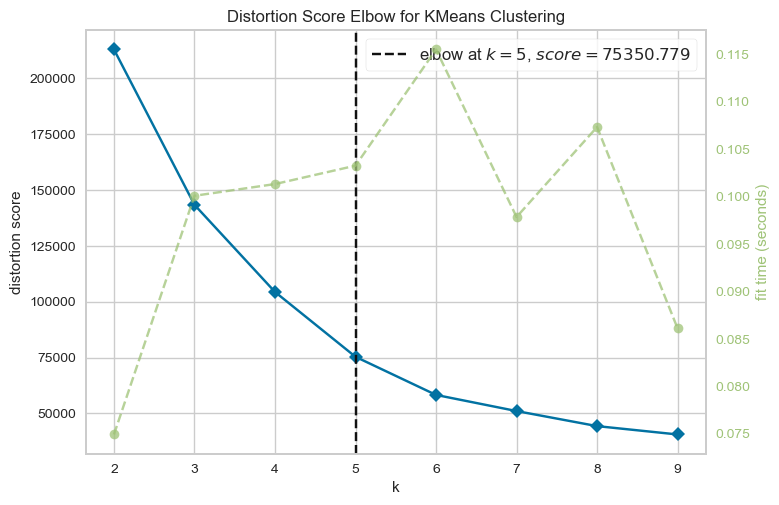

In [32]:
# to find an appropriate number of clusters, the elbow method will be used
# inertia for a number of clusters btw 2 and 10

from yellowbrick.cluster import KElbowVisualizer
model=KMeans(random_state=1)
visualizer=KElbowVisualizer(model,k=(2,10))
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

# graph above shows reduction of a distortion score as the number of clusters increases
# no clear elbow visible, choice of 5 or 6 seems to be fair
# another way to choose the best number of clusters is to plot the silhuette score in a function of number of clusters


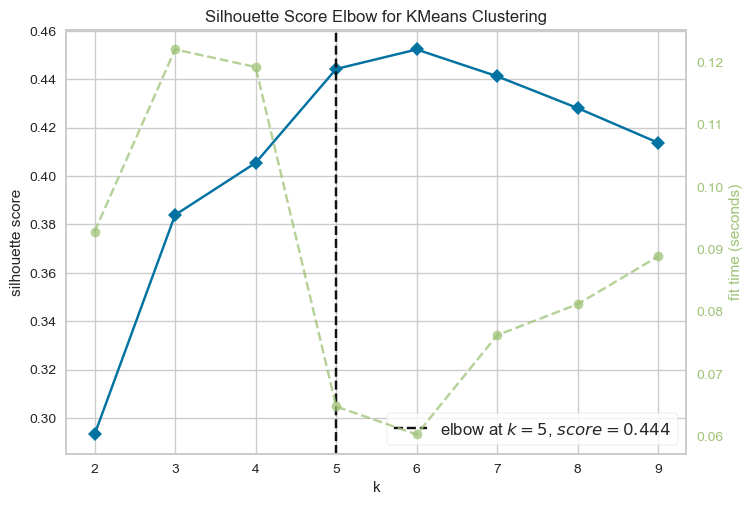

In [33]:
model=KMeans(random_state=1)
visualizer=KElbowVisualizer(model,k=(2,10),metric='silhouette')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

** 5 clusters

In [35]:
KM_5_clusters=KMeans(n_clusters=5,init='k-means++').fit(X_numerics)
KM5_clustered=X_numerics.copy()
KM5_clustered.loc[:,'Cluster']=KM_5_clusters.labels_

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


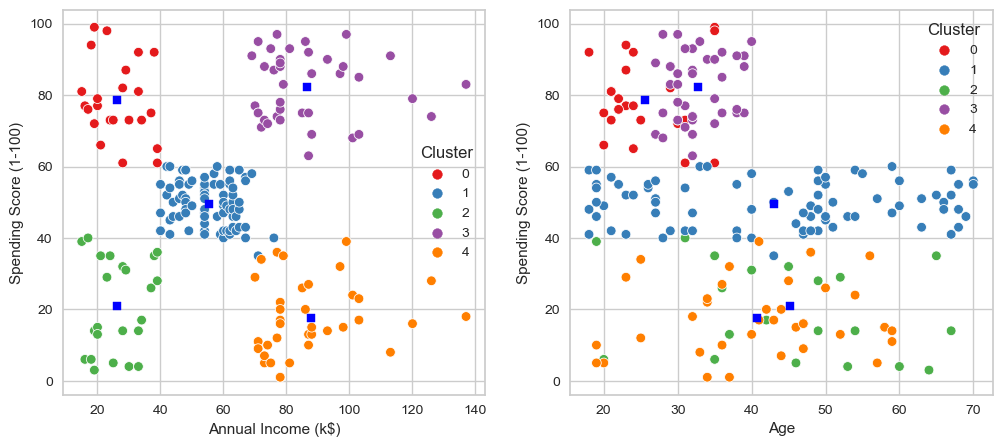

In [37]:
fig1,(axes)=plt.subplots(1,2,figsize=(12,5))
scat_1=sns.scatterplot('Annual Income (k$)','Spending Score (1-100)',data=KM5_clustered,
                      hue='Cluster',ax=axes[0],palette='Set1',legend='full')
sns.scatterplot('Age','Spending Score (1-100)',data=KM5_clustered, hue='Cluster',
               palette='Set1',ax=axes[1],legend='full')
axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

# there are no distinct groups in terms of age

In [38]:
# Size of clusters
KM_clust_sizes=KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns=['KM_size']
KM_clust_sizes
# it is not very helpful in terms of a visualization in a static model 
# but if run the code in an interactive environment, you can rotate it

KM_size
Cluster         
0             23
1             79
2             23
3             39
4             36

In [42]:
import importlib
importlib.import_module('mpl_toolkits').__path__

_NamespacePath(['C:\\Users\\MYCOM\\anaconda3\\lib\\site-packages\\mpl_toolkits'])

C:\Users\MYCOM\AppData\Local\Temp\ipykernel_16476\3794787374.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig,rect=[0,0,.99,1],elev=20,azim=210)


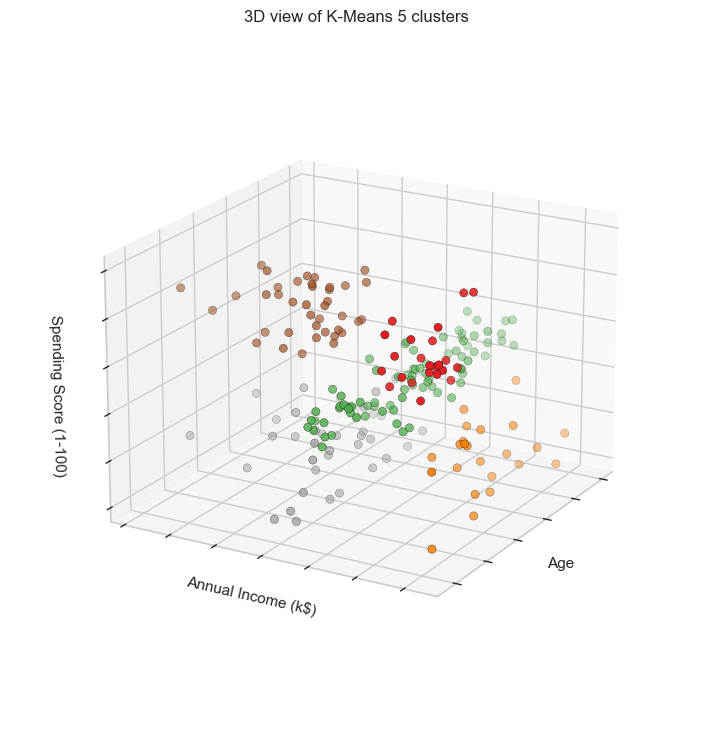

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(7,7))
ax=Axes3D(fig,rect=[0,0,.99,1],elev=20,azim=210)
ax.scatter(KM5_clustered['Age'],
          KM5_clustered['Annual Income (k$)'],
          KM5_clustered['Spending Score (1-100)'],
          c=KM5_clustered['Cluster'],
          s=35,edgecolor='k',cmap=plt.cm.Set1)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist=12
plt.show()

In [47]:
import plotly as py
import plotly.graph_objs as go
def tracer(db,n,name):
    return go.Scatter3d(
    x=db[db['Cluster']==n]['Age'],
    y=db[db['Cluster']==n]['Spending Score (1-100)'],
    z=db[db['Cluster']==n]['Annual Income (k$)'],
    mode='markers',
    name=name,
    marker=dict(size=5))

trace0=tracer(KM5_clustered,0,'Cluster 0')
trace1=tracer(KM5_clustered,1,'Cluster 1')
trace2=tracer(KM5_clustered,2,'Cluster 2')
trace3=tracer(KM5_clustered,3,'Cluster 3')
trace4=tracer(KM5_clustered,4,'Cluster 4')

data=[trace0,trace1,trace2,trace3,trace4]
layout=go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')))

fig=go.Figure(data=data,layout=layout)
py.offline.iplot(fig)

In [68]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=0)
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
#visualizer.fit(X_numerics)
#visualizer.show()
plt.show()

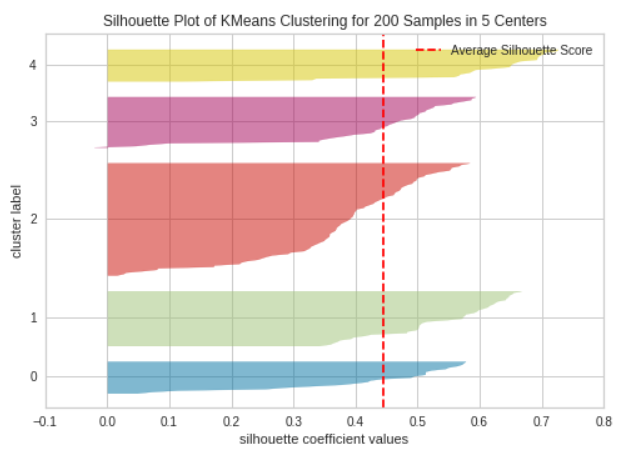
** 6 clusters

In [69]:
KM_6_clusters=KMeans(n_clusters=6,init='k-means++').fit(X_numerics)
KM6_clustered=X_numerics.copy()
KM6_clustered.loc[:,'Cluster']=KM_6_clusters.labels_

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



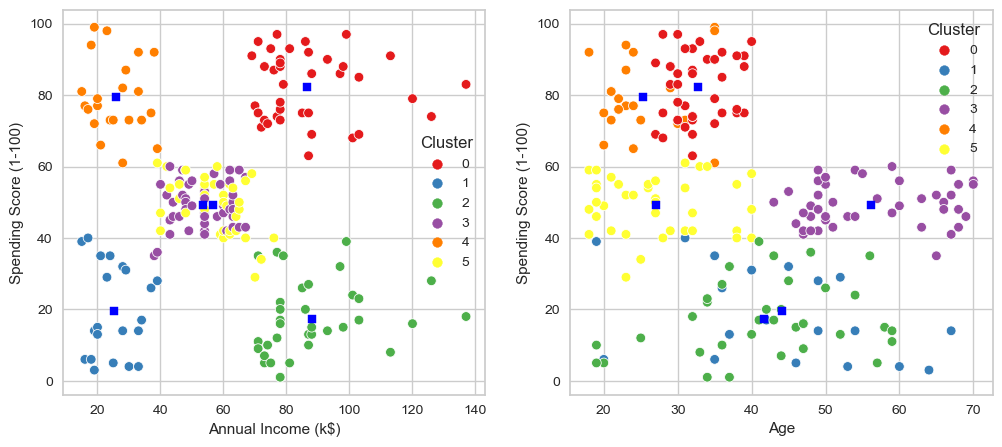

In [70]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [71]:
# threre are no distinct groups is terms of customers age
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

KM_size
Cluster         
0             39
1             21
2             35
3             45
4             22
5             38

In [72]:
# plotly interactive 3D plot

trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


In [74]:
model = KMeans(n_clusters=6, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
#visualizer.fit(X_numerics)
#visualizer.show()
plt.show()

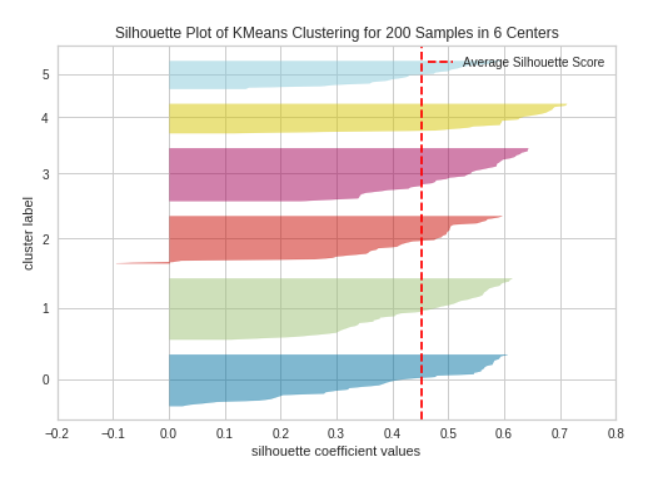

## DBSCAN

In [75]:
from sklearn.cluster import DBSCAN
from itertools import product
eps_values=np.arange(8,12.75,0.25)
min_samples=np.arange(3,10)
DBSCAN_params=list(product(eps_values,min_samples))
# DBSCAN created clusters itself based on those two parameters

In [77]:
from sklearn.metrics import silhouette_score
no_of_clusters=[]
sil_score=[]
for p in DBSCAN_params:
    DBS_clustering=DBSCAN(eps=p[0],min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics,DBS_clustering.labels_))

# heatplot shows how many clusters were generated by the DBSCAN algorithm

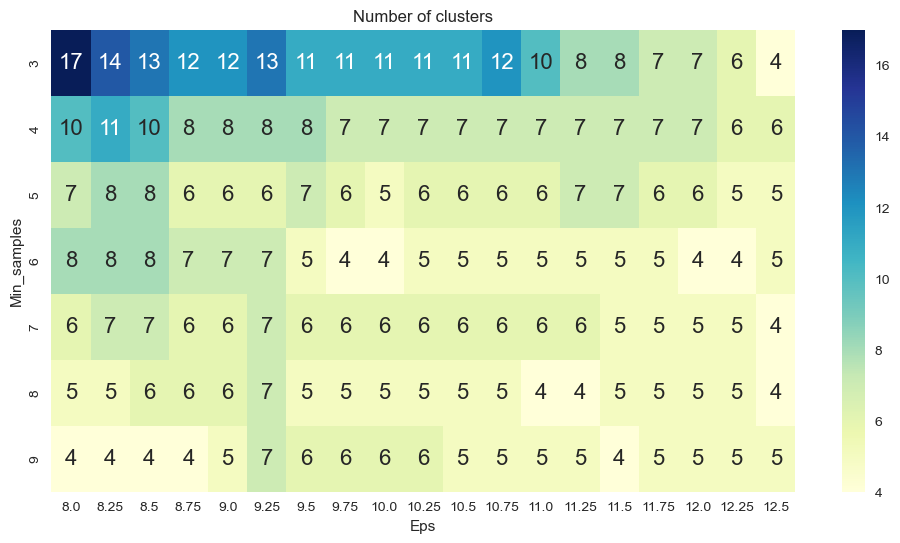

In [79]:
tmp=pd.DataFrame.from_records(DBSCAN_params,columns=['Eps','Min_samples'])
tmp['No_of_clusters']=no_of_clusters
pivot_1=pd.pivot_table(tmp,values='No_of_clusters',index='Min_samples',columns='Eps')
fig,ax=plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1,annot=True,annot_kws={'size':16},cmap='YlGnBu',ax=ax)
ax.set_title('Number of clusters')
plt.show()

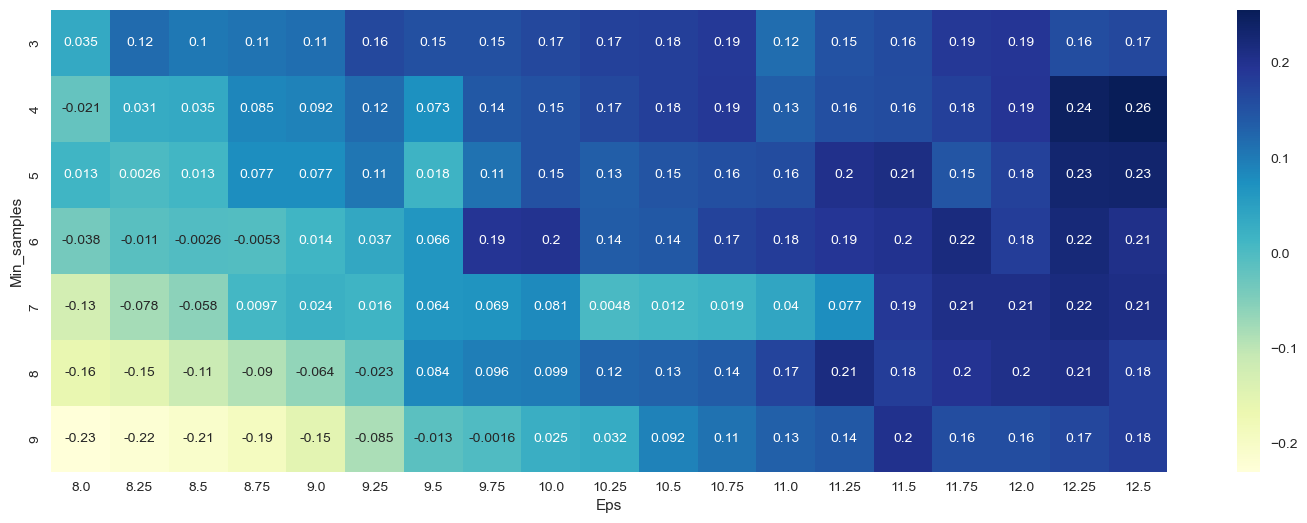

In [80]:
# most of the combinations gives 4-7 clusters
# to decide, use silhuette score metric
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [82]:
# global max: eps=12.5, min_samples=4
DBS_clustering=DBSCAN(eps=12.5,min_samples=4).fit(X_numerics)
DBSCAN_clustered=X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster']=DBS_clustering.labels_

In [83]:
# check size of clusters
DBSCAN_clust_sizes=DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns=['DBSCAN_size']
DBSCAN_clust_sizes

DBSCAN_size
Cluster             
-1                18
 0               112
 1                 8
 2                34
 3                24
 4                 4

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



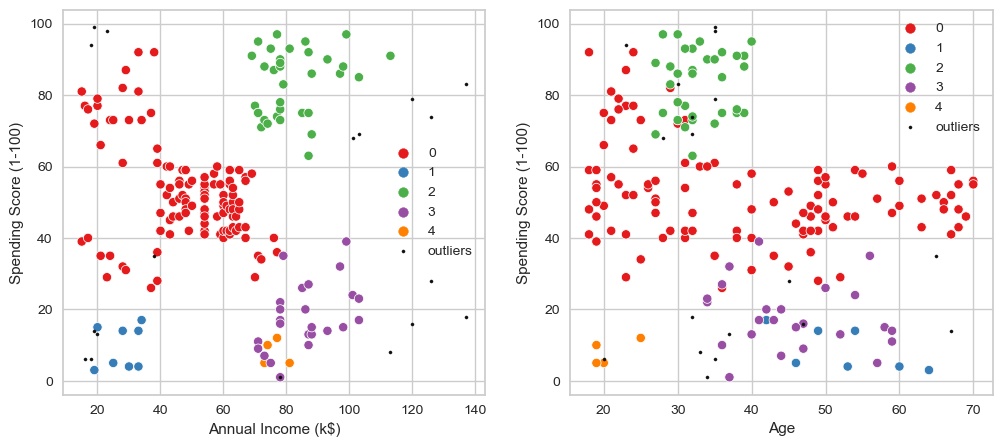

In [84]:
# there are 18 outliers (-1)
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()


## Affinity Propagation

In [92]:
X_numerics

Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]

In [93]:
range(-20000,-5000,100)

range(-20000, -5000, 100)

In [100]:
no_of_clusters = []
preferences = range(-20000,-5000,100) # arbitraty chosen range
af_sil_score = [] # silouette scores

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(X_numerics)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

C:\Users\MYCOM\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:250: ConvergenceWarning:

Affinity propagation did not converge, this model will not have any cluster centers.



preference  clusters  sil_score
0     -20000.0       5.0   0.255563
94    -10600.0       6.0   0.255563
96    -10400.0       6.0   0.255563
97    -10300.0       6.0   0.255563
98    -10200.0       6.0   0.255563

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



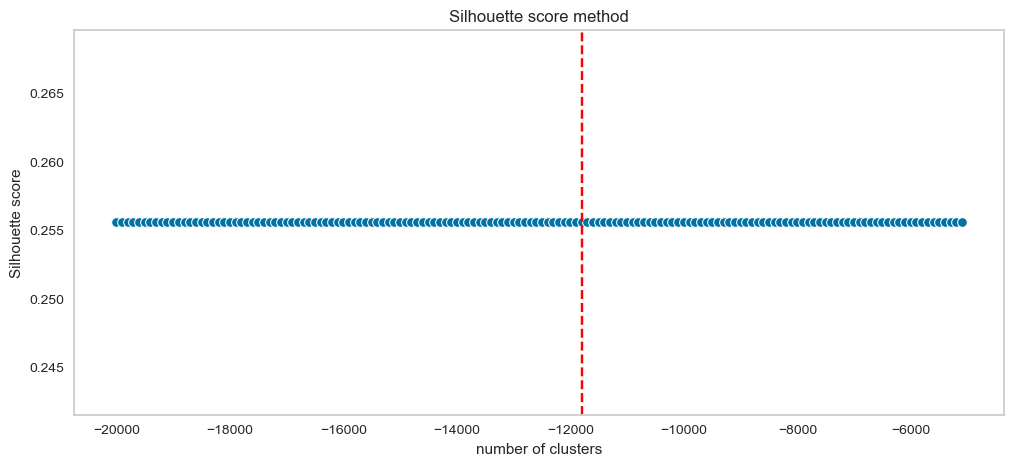

In [101]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(preferences, af_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(-11800, ls="--", c="red")
plt.grid()
plt.show()

In [102]:
AF = AffinityPropagation(preference=-11800).fit(X_numerics)
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_ # append labels to points
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

AF_size
Cluster         
0             22
1             22
2             44
3             39
4             34
5             39

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



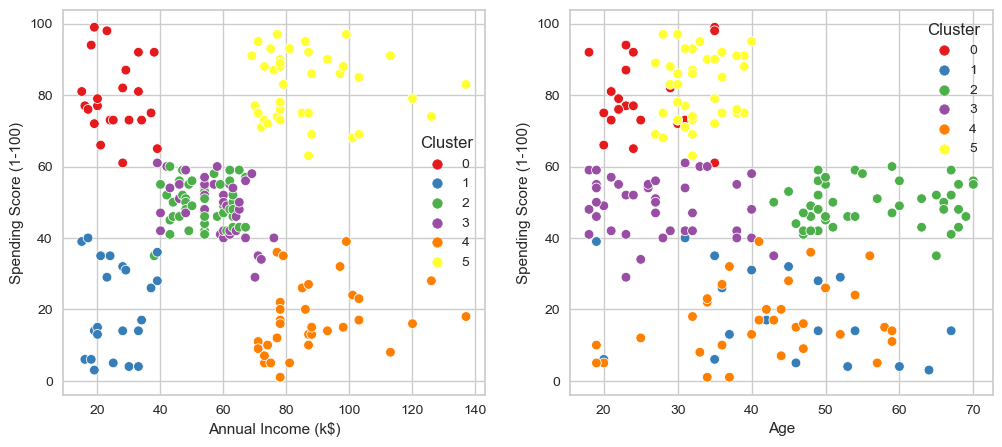

In [103]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()
# relatively even-sized clusters similar to ones created by K-Means

## Comparison

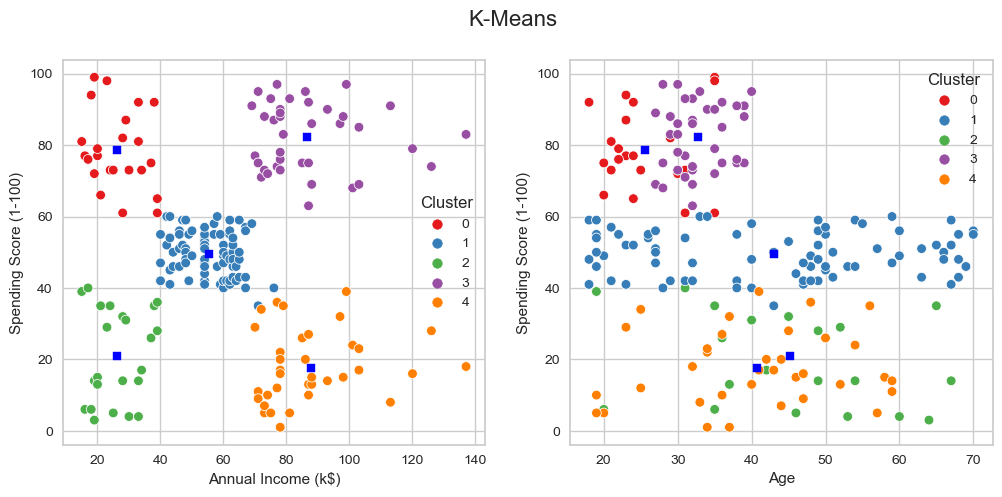

In [104]:
fig1.suptitle('K-Means', fontsize=16)
fig1

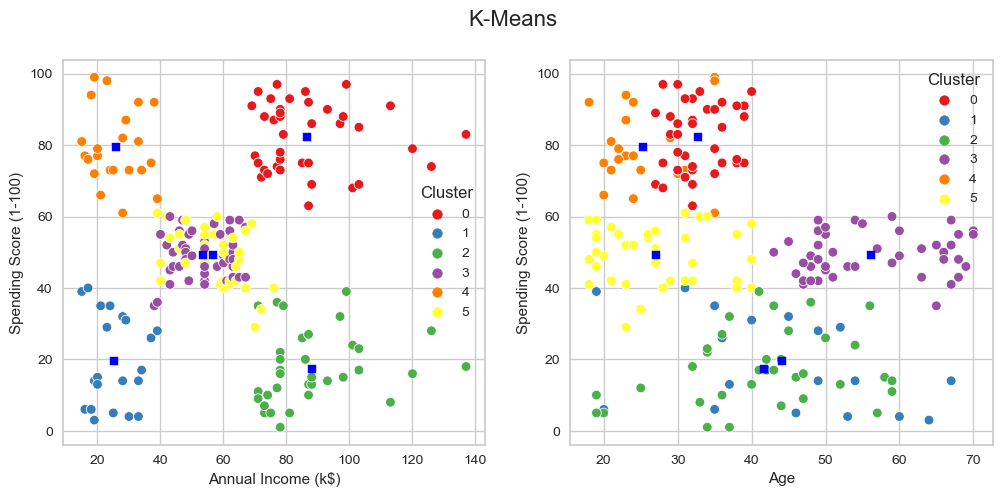

In [105]:
fig11.suptitle('K-Means', fontsize=16)
fig11

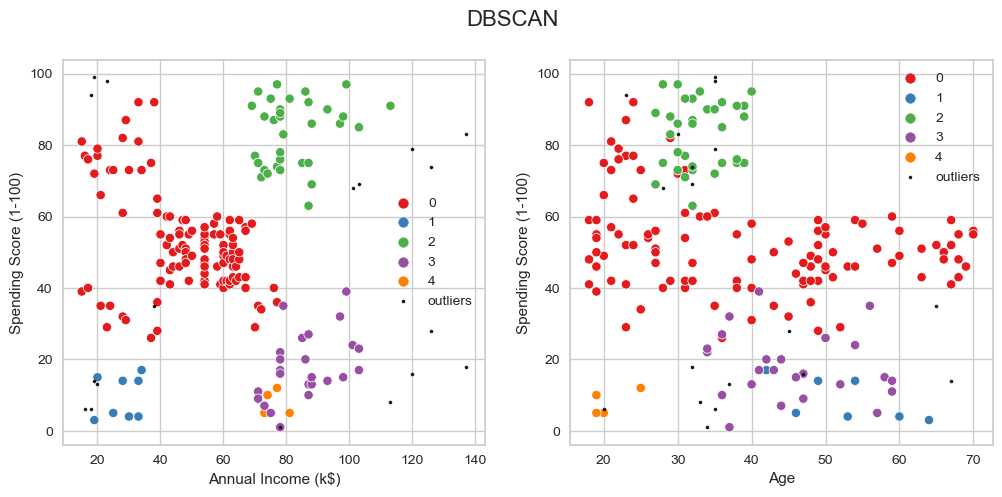

In [106]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

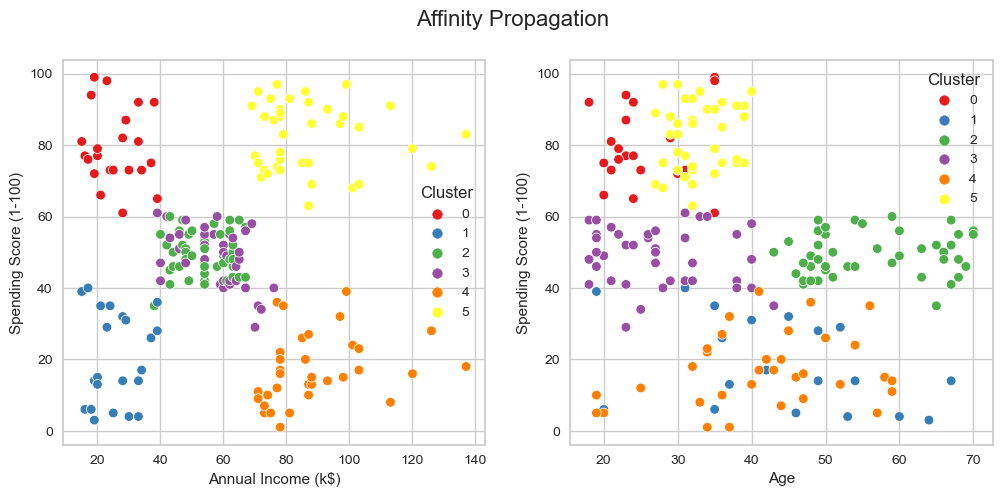

In [107]:
fig3.suptitle('Affinity Propagation', fontsize=16)
fig3

In [108]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes, AF_clust_sizes],axis=1, sort=False)
clusters

KM_size  DBSCAN_size  AF_size
Cluster                               
 0          39.0        112.0     22.0
 1          21.0          8.0     22.0
 2          35.0         34.0     44.0
 3          45.0         24.0     39.0
 4          22.0          4.0     34.0
 5          38.0          NaN     39.0
-1           NaN         18.0      NaN